## <center> Code of "Rotational copy-move forgery detection using SIFT and region growing strategies" </center>

Paper Link: [Rotational copy-move forgery detection using SIFT and region growing strategies](https://link.springer.com/article/10.1007/s11042-019-7165-8)

For more details please go through the paper.

___

In [27]:
from SIFT_algorithm import SIFT
import numpy as np
import cv2
from tqdm import tqdm
from matplotlib.pyplot import imshow
import os
import psutil

Path = "D:\\MTech-AI\\MTECH - AI\\Semester 3\\Copy-Move Forgery Detection\\Project\Datasets\\CoMoFoD_small_v2\\"

### Algorithm given in paper:

![](Algorithm.png)

### Get input image and apply Gaussian smooth with 5x5, sigma=1.0

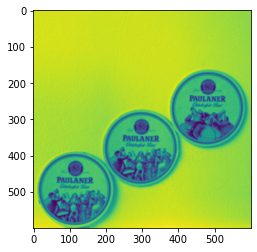

In [31]:
Image_name = "006_F.png"

image = Path + Image_name
# print(image)
## Coin: D:\MTech-AI\MTECH - AI\Semester 3\Project\CoMoFoD_small_v2\085_F_JC9.jpg
# imshow(image)

image = cv2.imread(image)
Vis_img = cv2.resize(image, (600, 600))

img   = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )


img = cv2.resize(img, (600, 600))
img = cv2.GaussianBlur(img, (5, 5), 1)

cv2.imwrite('Gaussian551.png', img)

imshow(img)

### Get keypoints from SIFT. Output of algorithm will be: 

$$K((x_i, y_i), S_i, θ_i)$$



Where:
      
$$(x_i, y_i):   Position$$ 

$$S_i:    Scale$$

$$θ_i:   Orientation$$

In [32]:
keypoints = SIFT("Gaussian551.png")

print("Keypoints from SIFT algorithm: \n\n\n ")
keypoints

SIFT processing...
Building DOG octave...
DOG octave created
Generating keypoints and orientations...
Building DOG octave...
DOG octave created
Generating keypoints and orientations...
Building DOG octave...
DOG octave created
Generating keypoints and orientations...
Building DOG octave...
DOG octave created
Generating keypoints and orientations...
254
SIFT Keypoints generated... 

 Saving result in.. result.jpg
Done!
Keypoints from SIFT algorithm: 


 


[[array([502.9484361]), array([239.93409827]), 0.5, 15],
 [array([502.9484361]), array([239.93409827]), 0.5, 45],
 [array([502.9484361]), array([239.93409827]), 0.5, 65],
 [array([502.9484361]), array([239.93409827]), 0.5, 295],
 [array([437.91815568]), array([240.3864082]), 0.5, 5],
 [array([523.62988092]), array([241.5916965]), 0.5, 5],
 [array([466.89293702]), array([243.07473074]), 0.5, 5],
 [array([447.41970192]), array([248.93448859]), 0.5, 345],
 [array([451.52475924]), array([249.649204]), 0.5, 345],
 [array([483.51843065]), array([249.37594881]), 0.5, 345],
 [array([483.51843065]), array([249.37594881]), 0.5, 325],
 [array([443.2616207]), array([249.87582854]), 0.5, 15],
 [array([479.49231463]), array([250.26662066]), 0.5, 25],
 [array([479.49231463]), array([250.26662066]), 0.5, 35],
 [array([494.34448627]), array([250.55058689]), 0.5, 15],
 [array([520.098968]), array([250.66180332]), 0.5, 5],
 [array([455.93436204]), array([282.46752141]), 0.5, 315],
 [array([257.43303027])

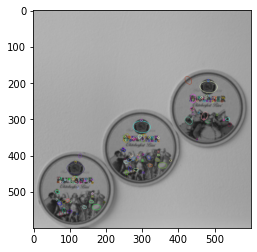

In [33]:
sift_out = cv2.imread("result.jpg")

imshow(sift_out)

### Save keypoints

In [34]:
np.save('Keypoints_coin_Save', keypoints)
print("Keypoints has been saved to Keypoints_Save.npy")

Keypoints has been saved to Keypoints_Save.npy


D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


### Load previous  keypoints

In [35]:
saved_keypoints = np.load('Keypoints_coin_Save.npy', allow_pickle=True)
print("Keypoints has been loaded...")
saved_keypoints

Keypoints has been loaded...


array([[array([502.9484361]), array([239.93409827]), 0.5, 15],
       [array([502.9484361]), array([239.93409827]), 0.5, 45],
       [array([502.9484361]), array([239.93409827]), 0.5, 65],
       ...,
       [array([482.66328311]), array([211.4653572]), 4.0, 5],
       [array([299.19808687]), array([320.85311847]), 4.0, 5],
       [array([117.43490297]), array([436.08160608]), 4.0, 5]],
      dtype=object)

### Number of keypoints generated mentioned in paper:


![](Num_kp_paper2.png)

### Total Number of Keypoints generated:

In [36]:
print("Number of Keypoints: ", len(saved_keypoints))

Number of Keypoints:  254


### Sort keypoints with Si:

In [37]:
# sorted_kp = keypoints[numpy.argsort(keypoints[:, 1])]
K = saved_keypoints[np.argsort(saved_keypoints[:, 2])]
K

array([[array([502.9484361]), array([239.93409827]), 0.5, 15],
       [array([318.51324049]), array([358.53436278]), 0.5, 305],
       [array([304.57709465]), array([359.60581496]), 0.5, 355],
       ...,
       [array([299.19808687]), array([320.85311847]), 4.0, 5],
       [array([482.66328311]), array([211.4653572]), 4.0, 5],
       [array([117.43490297]), array([436.08160608]), 4.0, 5]],
      dtype=object)

### Assigning threshold mentioned in paper:



<br>
$$δ_k = 0.05 * max{(|S_i|, |S_j|)}$$
$$δ_h = 0.05$$
$$δ_r = 0.98$$

In [38]:
delta_k = "0.015 * np.max([abs(S_i), abs(S_j)])"
delta_h = 0.05
delta_r = 0.98

print("δk = ", delta_k)
print("δh = ", delta_h)
print("δr = ", delta_r)

δk =  0.015 * np.max([abs(S_i), abs(S_j)])
δh =  0.05
δr =  0.98


### For each Ki in K, Choose another Kj in K with |Si-Sj| < δk

In [39]:
ki_kj = []

for index_i, k_i in enumerate(K):
    for index_j, k_j in enumerate(K):
        if index_i != index_j:
            
            S_i = k_i[2]
            S_j = k_j[2]

            delta_k = 0.015 * np.max([abs(S_i), abs(S_j)])    ## Value of threshold δk

            if (abs(S_i)-abs(S_j)) < delta_k:
                ki_kj.append([k_i, k_j])            

In [40]:
len(ki_kj)

51495

### Hu's invariant moments calculations:

In [41]:
def Hu_moments(i, j, h):
    
    Hu_A  = cv2.HuMoments(cv2.moments(i)).flatten()
    Hu_B  = cv2.HuMoments(cv2.moments(j)).flatten()
    
    Hu_rB = cv2.HuMoments(cv2.moments(h)).flatten()
    
    
    # Log scale hu moments 
    
    for n in range(0,7):
        
        Hu_A[n]  = -1* np.copysign(1.0, Hu_A[n]) * np.log10(abs(Hu_A[n]))
        
    for n in range(0,7):
        
        Hu_B[n]  = -1* np.copysign(1.0, Hu_B[n]) * np.log10(abs(Hu_B[n]))
        
    for n in range(0,7):
        
        Hu_rB[n] = -1* np.copysign(1.0, Hu_rB[n]) * np.log10(abs(Hu_rB[n]))
     
    
    #Distance calculation..
    
    D1 = []
    D2 = []
    
    for m in range(0,7):
        
        d1 = (Hu_A[m]-Hu_B[m])**2
        d2 = (Hu_A[m]-Hu_rB[m])**2
        
        D1.append(d1)
        D2.append(d2)
        
    D1 = sum(D1)
    D2 = sum(D2)
    
    diff = np.min([D1, D2])
    
    
    
#     diff = np.linalg.norm(Non_rotated),np.linalg.norm(Rotated)
#     diff = np.min([diff[0], diff[1]])
    
    return diff

In [42]:
def Hu_moments(i, j, h):
    
    d1 = (cv2.matchShapes(i , j, cv2.CONTOURS_MATCH_I3,0))*10
    d2 = (cv2.matchShapes(i , h, cv2.CONTOURS_MATCH_I3,0))*10
    
    diff = np.min([d1, d2])
    
    return diff

### Find Hu's invariant moments for initial blocks (ri, rj) and find the values that are less than δh. Also rotate rj to make identical orientation

In [43]:
ri_rj = []
rejected_regions = 0

for k in ki_kj:
    
    ki_y = k[0][0][0]
    ki_x = k[0][1][0]
    kj_y = k[1][0][0]
    kj_x = k[1][1][0]
    
    thetta_ri = k[0][3]
    thetta_rj = k[1][3]
    
    ri = img[int(ki_y)-3:int(ki_y)+3, int(ki_x)-3:int(ki_x)+3]
    rj = img[int(kj_y)-3:int(kj_y)+3, int(kj_x)-3:int(kj_x)+3]
            
    rj_FL = cv2.flip(rj, 1)
    
    diff = Hu_moments(ri, rj, rj_FL)
    
    try:

        if diff < delta_h:

            (h, w) = rj.shape[:2]
            center = (w / 2, h / 2)
            scale = 1.0

            thetta_ident = thetta_ri-thetta_rj

            M = cv2.getRotationMatrix2D(center, thetta_ident, scale)
            Rot_rj = cv2.warpAffine(rj, M, (h, w))

            ri_rj.append([[ri, (ki_y, ki_x), thetta_ri], [Rot_rj, (kj_y, kj_x), thetta_rj]])  
            
    except:
        
        rejected_regions = rejected_regions + 1
        print(f"Cannot create bounding box for the keypoint at the corner of image, hence regions rejected: {rejected_regions}", end="\r")

In [44]:
len(ri_rj)

11708

### Region growing: (Please run updated Region growing code-2)

In [45]:
def grow(kp, img):
    
    Sr_blocks_chk = []
    Sr_blocks = []
    
    w_l = int(kp[0] - 50)
    w_r = int(kp[0] + 50)
    h_t = int(kp[1] - 50)
    h_d = int(kp[1] + 50)
    
    
    Sr_blocks_chk = [((h_t,h_d),(w_l,w_r))]
    Sr_blocks = [((h_t,h_d),(w_l,w_r))]
    blocks_size = [((h_t,h_d),(w_l,w_r))]
    
    m = [100, -100]
    (y, x) = img.shape

    bi_bj = [img[h_t: h_d, w_l: w_r]]

    while True:

        if (len(Sr_blocks)) != 0: 

            h, w = Sr_blocks.pop()

            h_t = h[0]
            h_d = h[1]
            w_l = w[0]
            w_r = w[1]


            ## horizontal move:


            for i in range(0, 2):

                x1 = max(0, (w_l)+m[i])
                x2 = min(x, (w_r)+m[i])

                y1 = max(0, (h_t))
                y2 = min(y, (h_d))

                if (x1 <= x and x2 >= 0) and (x1 != x2 and y1 != y2):


                    if ((y1, y2), (x1,x2)) not in Sr_blocks_chk:


                        im = img[y1:y2, x1:x2]
                        bi_bj.append((im))

                        blocks_size.append(((y1,y2), (x1,x2)))
                        Sr_blocks.append(((y1,y2), (x1,x2))) 


                Sr_blocks_chk.append(((y1,y2), (x1,x2))) 


            ## vertical move:

            for j in range(0, 2):

                x1 = max(0, (w_l))
                x2 = min(x, (w_r))

                y1 = max(0, (h_t)+m[j])
                y2 = min(y, (h_d)+m[j])

                if (y1 <= x and y2 >= 0) and (x1 != x2 and y1 != y2):


                    if ((y1, y2), (x1,x2)) not in Sr_blocks_chk:


                        im = img[y1:y2, x1:x2]
                        bi_bj.append((im))

                        blocks_size.append(((y1,y2), (x1,x2)))
                        Sr_blocks.append(((y1,y2), (x1,x2))) 


                Sr_blocks_chk.append(((y1,y2), (x1,x2)))


        else:

            return blocks_size, bi_bj


In [46]:
def region_grow(regions, img, pos):
    
    if pos=="ri":
      print("Region growing on 'Ri' region")

      size_gr = []
      area_gr = []

      for i in range(len(ri_rj)):

          kp = [regions[i][0][1][0], regions[i][0][1][1]]
          s, a = grow(kp, img)

          size_gr.append(s)
          area_gr.append(a)
  
      return size_gr, area_gr

    if pos=="rj":
        print("Region growing on 'Rj' region")


        size_gr = []
        area_gr = []

        for i in range(len(regions)):

            kp = [regions[i][1][1][0], regions[i][1][1][1]]
            thetta_rj = regions[i][0][2]
            thetta_rj = regions[i][1][2]


            (h, w) = img.shape[:2]
            center = (w / 2, h / 2)
            scale = 1.0
        
            thetta_ident = thetta_ri-thetta_rj

            M = cv2.getRotationMatrix2D(center, thetta_ident, scale)
            Rot_img = cv2.warpAffine(img, M, (h, w))
            
            s, a = grow(kp, Rot_img)

            size_gr.append(s)
            area_gr.append(a)
    
        return size_gr, area_gr

In [ ]:
ri_s, ri_a = region_grow(ri_rj, img, "ri")
rj_s, rj_a = region_grow(ri_rj, img, "rj")

In [ ]:
np.save('Regions', [(ri_s, ri_a), (rj_s, rj_a)])
print("Keypoints has been saved to Keypoints_Save.npy")

### Find Hu's moments for all surrounded region and if it's value greater than δh, then append it as a copy-move region

In [ ]:
copy_move_area = []
copy_move_size = []

if len(ri_a)==len(rj_a):
  for i, i_areas in enumerate(ri_a):
    for j, j_areas in enumerate(rj_a):

      if len(i_areas) == len(j_areas):
        if len(ri_s[i]) == len(rj_s[i]):
          
          try:
            if ri_s[i][j] == rj_s[i][j]:

              for m in range(len(i_areas)):
                  
                diff = Hu_moments(i_areas[m], j_areas[m], j_areas[m])
                

                if diff < delta_h:

                  copy_move_size.append([ri_s[i][j], rj_s[i][j]])
                  copy_move_area.append([ri_a[i][j], rj_a[i][j]])

          except IndexError: 
            pass


In [50]:
len(copy_move_area)

0

### Region Growing updated code-1:

In [51]:
copy_move_area = []
Sr_blocks_chk = []
Sr_blocks = []
copy_move_size = []

length = 3

# for i in range(len(ri_rj)):
for i in tqdm (range(len(ri_rj)), desc=f"CPU usage: {psutil.cpu_percent(0)}%, Regions covering..."):

  Sr_blocks_chk = []
  Sr_blocks = []
    
  kp = [ri_rj[i][0][1][0], ri_rj[i][0][1][1]]

  w_l = int(kp[0] - length)
  w_r = int(kp[0] + length)
  h_t = int(kp[1] - length)
  h_d = int(kp[1] + length)


  Sr_blocks.append(((h_t,h_d),(w_l,w_r)))

  m = [length*2, -(length*2)]
  (y, x) = img.shape

  while (len(Sr_blocks)) != 0: 

    h, w = Sr_blocks.pop()

    h_t = h[0]
    h_d = h[1]
    w_l = w[0]
    w_r = w[1]


    ## horizontal move:


    for n in range(0, 2):

        x1 = max(0, (w_l)+m[n])
        x2 = min(x, (w_r)+m[n])

        y1 = max(0, (h_t))
        y2 = min(y, (h_d))

        if (x1 <= x and x2 >= 0) and (x1 != x2 and y1 != y2):


            if ((y1, y2), (x1,x2)) not in Sr_blocks_chk:


                im = img[y1:y2, x1:x2]

                kp_h = [ri_rj[i][1][1][0], ri_rj[i][1][1][1]]
                thetta_rj = ri_rj[i][0][2]
                thetta_rj = ri_rj[i][1][2]


                (h, w) = img.shape[:2]
                center = (w / 2, h / 2)
                scale = 1.0
            
                thetta_ident = thetta_ri-thetta_rj

                M = cv2.getRotationMatrix2D(center, thetta_ident, scale)
                Rot_img = cv2.warpAffine(img, M, (h, w))

                w_lj = int(kp_h[0] - length)
                w_rj = int(kp_h[0] + length)
                h_tj = int(kp_h[1] - length)
                h_dj = int(kp_h[1] + length)
                
                xj1 = max(0, (w_lj)+m[n])
                xj2 = min(x, (w_rj)+m[n])
                yj1 = max(0, (h_tj))
                yj2 = min(y, (h_dj))

                im_Rj = Rot_img[yj1: yj2, xj1: xj2]
                im_j  = img[yj1: yj2, xj1: xj2]

                
                diff = Hu_moments(im, im_j, im_Rj)

                if diff < delta_h:

                  copy_move_size.append(((y1,y2), (x1,x2)))
                  copy_move_size.append(((yj1,yj2), (xj1,xj2)))
#                   copy_move_area.append(((im), (Rot_img)))
                
                  Sr_blocks.append(((y1,y2), (x1,x2))) 


        Sr_blocks_chk.append(((y1,y2), (x1,x2))) 
#         Sr_blocks_chk.append(((yj1,yj2), (xj1,xj2)))

    ## vertical move:

    for n in range(0, 2):

        x1 = max(0, (w_l))
        x2 = min(x, (w_r))

        y1 = max(0, (h_t)+m[n])
        y2 = min(y, (h_d)+m[n])

        if (y1 <= x and y2 >= 0) and (x1 != x2 and y1 != y2):


            if ((y1, y2), (x1,x2)) not in Sr_blocks_chk:
                

                im = img[y1:y2, x1:x2]

                kp_v = [ri_rj[i][1][1][0], ri_rj[i][1][1][1]]
                thetta_rj = ri_rj[i][0][2]
                thetta_rj = ri_rj[i][1][2]


                (h, w) = img.shape[:2]
                center = (w / 2, h / 2)
                scale = 1.0
            
                thetta_ident = thetta_ri-thetta_rj

                M = cv2.getRotationMatrix2D(center, thetta_ident, scale)
                Rot_img = cv2.warpAffine(img, M, (h, w))

                w_lj = int(kp_v[0] - length)
                w_rj = int(kp_v[0] + length)
                h_tj = int(kp_v[1] - length)
                h_dj = int(kp_v[1] + length)
                
                xj1 = max(0, (w_lj))
                xj2 = min(x, (w_rj))
                yj1 = max(0, (h_tj)+m[n])
                yj2 = min(y, (h_dj)+m[n])


                im_Rj = Rot_img[yj1: yj2, xj1: xj2]
                im_j = img[yj1: yj2, xj1: xj2]
                
                diff = Hu_moments(im, im_j, im_Rj)

                if diff < delta_h:

                  copy_move_size.append(((y1,y2), (x1,x2)))
                  copy_move_size.append(((yj1,yj2), (xj1,xj2)))
#                   copy_move_area.append(((im), (Rot_img)))
                
                  Sr_blocks.append(((y1,y2), (x1,x2))) 

        Sr_blocks_chk.append(((y1,y2), (x1,x2)))
#         Sr_blocks_chk.append(((yj1,yj2), (xj1,xj2)))        

CPU usage: 13.8%, Regions covering...:   0%|          | 0/11708 [00:00<?, ?it/s]


NameError: name 'Humoments' is not defined

### Region Growing updated code-2:

In [52]:
copy_move_area = []
Sr_blocks_chk = []
Sr_blocks = []
copy_move_size = []

length = 3

for i in tqdm (range(len(ri_rj)), desc=f"CPU usage: {psutil.cpu_percent(0)}%, Regions covering..."):

  kp = [ri_rj[i][0][1][0], ri_rj[i][0][1][1]]

  Sr_blocks_chk = []
  Sr_blocks = []

  w_l = int(kp[0] - length)
  w_r = int(kp[0] + length)
  h_t = int(kp[1] - length)
  h_d = int(kp[1] + length)


  Sr_blocks = [((h_t,h_d),(w_l,w_r))]

  m = [length*2, -(length*2)]
  (y, x) = img.shape


  while (len(Sr_blocks)) != 0: 

    h, w = Sr_blocks.pop()

    h_t = h[0]
    h_d = h[1]
    w_l = w[0]
    w_r = w[1]


    ## horizontal move:


    for n in range(0, 2):

        x1 = max(0, (w_l)+m[n])
        x2 = min(x, (w_r)+m[n])

        y1 = max(0, (h_t))
        y2 = min(y, (h_d))

        if (x1 <= x and x2 >= 0) and (x1 != x2 and y1 != y2):


            if ((y1, y2), (x1,x2)) not in Sr_blocks_chk:


                im = img[y1:y2, x1:x2]

                kp = [ri_rj[i][1][1][0], ri_rj[i][1][1][1]]
                thetta_rj = ri_rj[i][0][2]
                thetta_rj = ri_rj[i][1][2]


                (h, w) = img.shape[:2]
                center = (w / 2, h / 2)
                scale = 1.0
            
                thetta_ident = thetta_ri-thetta_rj

                M = cv2.getRotationMatrix2D(center, thetta_ident, scale)
                Rot_img = cv2.warpAffine(img, M, (h, w))

                x1j = int(kp[0] - length)
                x2j = int(kp[0] + length)
                y1j = int(kp[1] - length)
                y2j = int(kp[1] + length)

                im_Rj = Rot_img[y1j: y2j, x1j: x2j]
                im_j  = img[y1j: y2j, x1j: x2j]


                diff = Hu_moments(im, im_j, im_Rj)


                if diff < delta_h:

                  copy_move_size.append(((y1,y2), (x1,x2)))
                  copy_move_size.append(((y1j,y2j), (x1j,x2j)))
#                   copy_move_area.append(((im), (Rot_img)))
                  Sr_blocks.append(((y1,y2), (x1,x2))) 


        Sr_blocks_chk.append(((y1,y2), (x1,x2))) 


    ## vertical move:

    for n in range(0, 2):

        x1 = max(0, (w_l))
        x2 = min(x, (w_r))

        y1 = max(0, (h_t)+m[n])
        y2 = min(y, (h_d)+m[n])

        if (y1 <= x and y2 >= 0) and (x1 != x2 and y1 != y2):


            if ((y1, y2), (x1,x2)) not in Sr_blocks_chk:
                

                im = img[y1:y2, x1:x2]

                kp = [ri_rj[i][1][1][0], ri_rj[i][1][1][1]]
                thetta_rj = ri_rj[i][0][2]
                thetta_rj = ri_rj[i][1][2]


                (h, w) = img.shape[:2]
                center = (w / 2, h / 2)
                scale = 1.0
            
                thetta_ident = thetta_ri-thetta_rj

                M = cv2.getRotationMatrix2D(center, thetta_ident, scale)
                Rot_img = cv2.warpAffine(img, M, (h, w))

                x1j = int(kp[0] - length)
                x2j = int(kp[0] + length)
                y1j = int(kp[1] - length)
                y2j = int(kp[1] + length)

                im_Rj = Rot_img[y1j: y2j, x1j: x2j]
                im_j  = img[y1j: y2j, x1j: x2j]

                diff = Hu_moments(im, im_j, im_Rj)

                if diff < delta_h:

                  copy_move_size.append(((y1,y2), (x1,x2)))
                  copy_move_size.append(((y1j,y2j), (x1j,x2j)))
#                   copy_move_area.append(((im), (Rot_img)))
                  Sr_blocks.append(((y1,y2), (x1,x2))) 

        Sr_blocks_chk.append(((y1,y2), (x1,x2)))

CPU usage: 13.1%, Regions covering...: 100%|██████████| 11708/11708 [03:51<00:00, 50.65it/s] 


In [53]:
len(copy_move_size)

186246

### If region r_i after region growing greater than δr then consider it as final copy-move forgery region:

In [54]:
finial_copy_move_area = []
finial_copy_move_size = []

for index, region in enumerate( copy_move_size):
    r_i = region[0]
    r_i = np.average(ri)
    
    if r_i > delta_r:
        
        finial_copy_move_area.append(region)
        finial_copy_move_size.append(copy_move_size[index])

In [55]:
len(finial_copy_move_size)

186246

### Visualize Copy-move forgery region:

In [56]:
def visualize(blocks_size, fig):

    result = fig.copy()


    for i in range(len(blocks_size)):

        a, b = blocks_size[i]
        y1, y2 = a
        x1, x2 = b
        cv2.rectangle(result, (x1, y1), (x2, y2), (255, 0, 0), 1)
    
    print("Number of blocks: ", len(blocks_size))

    cv2.imwrite('Copy-move region_Result.jpg',result)      

    cv2.imshow("bounding_box", result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return

In [57]:
visualize(finial_copy_move_size, Vis_img)

Number of blocks:  186246


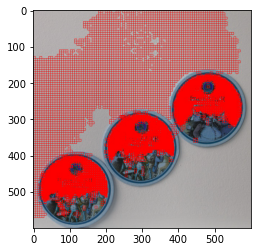

In [58]:
imshow(cv2.imread('Copy-move region_Result.jpg'))

___

## Reference Citation

Chen, CC., Lu, WY. & Chou, CH. Rotational copy-move forgery detection using SIFT and region growing strategies. Multimed Tools Appl 78, 18293–18308 (2019). https://doi.org/10.1007/s11042-019-7165-8

___